In [2]:
import warnings
from libra_py import trpes
%matplotlib inline
warnings.filterwarnings("ignore")  # Turn off warnings
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from libra_py import trpes

common_params = {
    "istep": 1000,
    "fstep": 4994,
    "dt": 0.5,
    "namd_nsteps": 3994,
    "units": "eV",
    "eprefix": "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c76-MOs60/step2/all_logfiles/step_",
    "esuffix": ".log",
    "input_file_type": 1,
    "logfile_read_params": {"number_of_states": 40},

    "iconds": [1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801],

    "de": 0.1,
    "emin": 0.0,
    "emax": 4.5,
    "sigma_e": 0.6
}

# NAMD methods and d-prefixes -
methods = {
    "FSSH":       "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/FSSH_latestnewNBRA_icond_",
    "IDA":        "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/IDA_latestnewNBRA_icond_",
    "MSDM":       "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/MSDM_latestnewNBRA_icond_",
    "FSSH2":      "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/FSSH2_latestnewNBRA_icond_",
    "GFSH":       "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_",
    "MSDM_GFSH":  "/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/MSDM_GFSH_latestnewNBRA_icond_",
}


results = {}   
for method, dprefix in methods.items():
    print(f"Computing TRPES for {method}...")

    x = dict(common_params)
    x["dprefix"] = dprefix
    x["dsuffix"] = "/mem_data.hdf"

    # Compute TRPES
    time_bins, energy_grid, H_total = trpes.compute_trpes(x)

    # Compute avg energy
    numerator = np.sum(H_total * energy_grid[None, :], axis=1)
    denominator = np.sum(H_total, axis=1)
    denominator = np.where(denominator == 0, np.nan, denominator)

    avg_energy = numerator / denominator


    results[method] = {"time": time_bins, "energy": energy_grid, "H": H_total, "avg": avg_energy}

print("TRPES and average energies computed for all methods")


Computing TRPES for FSSH...
{'istep': 1000, 'fstep': 4994, 'dt': 0.5, 'namd_nsteps': 3994, 'units': 'eV', 'eprefix': '/projects/academic/alexeyak/kosar/cp2k/fullerenes/c76-MOs60/step2/all_logfiles/step_', 'esuffix': '.log', 'input_file_type': 1, 'logfile_read_params': {'number_of_states': 40}, 'iconds': [1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801], 'de': 0.1, 'emin': 0.0, 'emax': 4.5, 'sigma_e': 0.6, 'dprefix': '/projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/FSSH_latestnewNBRA_icond_', 'dsuffix': '/mem_data.hdf'}
Trajectory data contains 3994, while we only want 3994
The TRPES plot will be of the time legnth of 3994 points
The multiplication factor is 2
The shape of the effective E array is (3994, 41)
Initial iconds = [1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
Renormalizing iconds for istep = 1000, fstep = 4994 and

Trajectory data contains 3994, while we only want 3994
The TRPES plot will be of the time legnth of 3994 points
The multiplication factor is 2
The shape of the effective E array is (3994, 41)
Initial iconds = [1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
Renormalizing iconds for istep = 1000, fstep = 4994 and nsteps = 3994...
The effective iconds are = [1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801] (dropping off meaningless iconds)
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/MSDM_latestnewNBRA_icond_1/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/MSDM_latestnewNBRA_icond_201/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/MSDM_latestnewNBRA_icond_401/mem_data.hdf
Reading the

Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_201/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_401/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_601/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_801/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_1001/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_1201/mem_data.hdf
Reading the file /projects/academic/alexeyak/kosar/cp2k/fullerenes/c20-Aug24/ustep4_2.19eV_devel3/GFSH_latestnewNBRA_icond_1401/mem_data.hdf
Reading the file 

Plotting FSSH...

<Figure size 504x252 with 0 Axes>

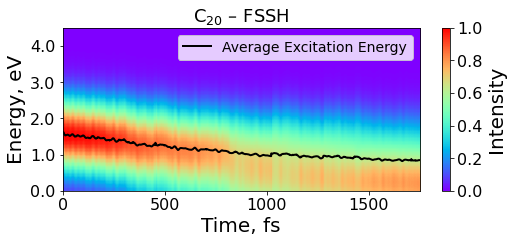

Saved: TRPES_FSSH.png
Plotting IDA...


<Figure size 504x252 with 0 Axes>

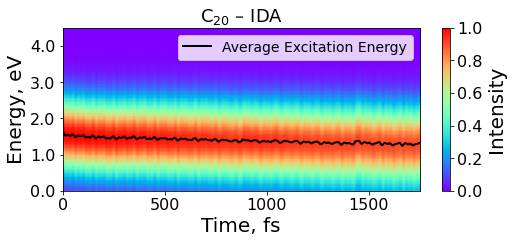

Saved: TRPES_IDA.png
Plotting MSDM...


<Figure size 504x252 with 0 Axes>

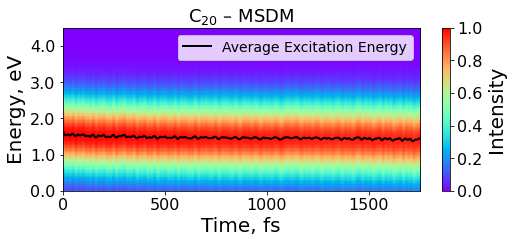

Saved: TRPES_MSDM.png
Plotting FSSH2...


<Figure size 504x252 with 0 Axes>

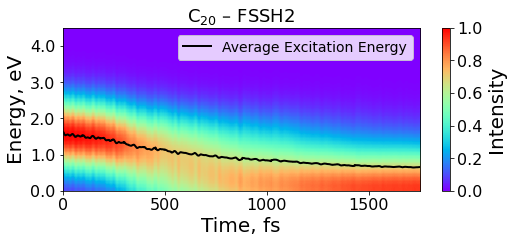

Saved: TRPES_FSSH2.png
Plotting GFSH...
efined! in the input parametersUse the default value 

<Figure size 504x252 with 0 Axes>

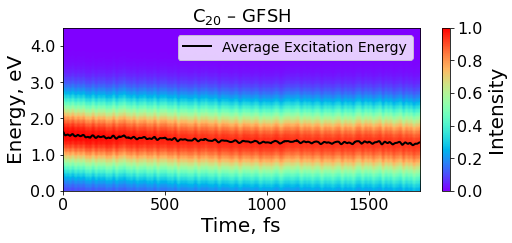

Saved: TRPES_GFSH.png
Plotting MSDM_GFSH...


<Figure size 504x252 with 0 Axes>

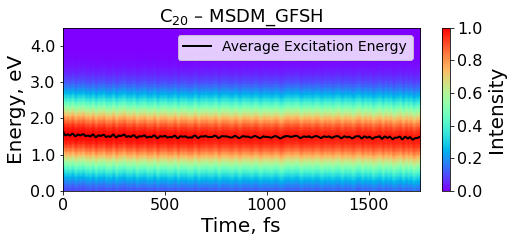

Saved: TRPES_MSDM_GFSH.png


In [5]:
import matplotlib.pyplot as plt

for method, data in results.items():

    print(f"Plotting {method}...")

    time_bins = data["time"]
    energy_grid = data["energy"]
    H_total = data["H"]
    avg_energy = data["avg"]

    plt.figure(figsize=(7, 3.5))

    trpes.plot_trpes(time_bins, energy_grid, H_total, {})

    
    plt.plot(time_bins, avg_energy, "k-", lw=2,
             label="Average Excitation Energy")

    plt.title(f"C$_{{20}}$ – {method}", fontsize=18)
    plt.xlim(0, 1750)
    plt.xticks(np.arange(0, 1751, 500))
    plt.legend(frameon=True, fontsize=14)
    filename = f"TRPES_{method}.png"
    plt.savefig(filename, dpi=600, bbox_inches="tight", facecolor="white", transparent=False)
    plt.show()
    print(f"Saved: {filename}")
